In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

In [2]:
datacovid = pd.read_excel('datasetcovidjktid.xlsx',sheet_name='dataset')

In [7]:
datacovid['Tanggal'] = pd.to_datetime(datacovid.Tanggal)

print(datacovid.Tanggal)

0     2020-03-01
1     2020-03-02
2     2020-03-03
3     2020-03-04
4     2020-03-05
         ...    
759   2022-03-30
760   2022-03-31
761   2022-04-01
762   2022-04-02
763   2022-04-03
Name: Tanggal, Length: 764, dtype: datetime64[ns]


In [12]:
len(datacovid.Tanggal)

764

In [11]:
datacovid['TanggalFormat'] = datacovid['Tanggal'].dt.strftime('%d-%m-%Y')

#startdate = datacovid['Tanggal'].iloc[0].dt.strftime('%d-%m-%Y')

print(datacovid.TanggalFormat)

0      01-03-2020
1      02-03-2020
2      03-03-2020
3      04-03-2020
4      05-03-2020
          ...    
759    30-03-2022
760    31-03-2022
761    01-04-2022
762    02-04-2022
763    03-04-2022
Name: TanggalFormat, Length: 764, dtype: object


In [13]:
datacovid.columns

Index(['Tanggal', 'Variant_Suspect', 'Day', 'ID_CUM_POSITIVE',
       'ID_CUM_HOSPITALIZED', 'ID_CUM_CURED', 'ID_CUM_DEATH',
       'JKT_CUM_POSITIVE', 'JKT_CUM_HOSPITALIZED', 'JKT_CUM_CURED',
       'JKT_CUM_DEATH', 'JKT_CUM_SELFISOLATION', 'JKT_CUM_ACTIVEPOSITIVE',
       'ID_DAILY_POSITIVE', 'ID_DAILY_HOSPITALIZED', 'ID_DAILY_CURED',
       'ID_DAILY_DEATH', 'JKT_DAILY_DEATH', 'JKT_DAILY_CURED',
       'JKT_DAILY_ISOLATION', 'JKT_DAILY_HOSPITALIZED', 'JKT_DAILY_POSITIVE',
       'JKT_DAILY_ACTIVEPOSITIVE', 'JKT_DAILY_TESTED', 'JKT_DAILY_POSTEST',
       'JKT_DAILY_NEGTEST', 'JKT_DAILY_POSTRATE', 'PoF', 'JKT_CONS_VALUE',
       'CoF', 'Risk', 'Risk_Criteria', 'TanggalFormat'],
      dtype='object')

In [15]:
hitung1 = datacovid.Day.sum()

print(hitung1)

121798


In [17]:
max1 = datacovid.JKT_DAILY_POSTRATE.max()

print(max1)

0.5670731707317073


In [ ]:
datacovid.describe(include="all", datetime_is_numeric=True)

<AxesSubplot:xlabel='Variant_Suspect', ylabel='JKT_DAILY_DEATH'>

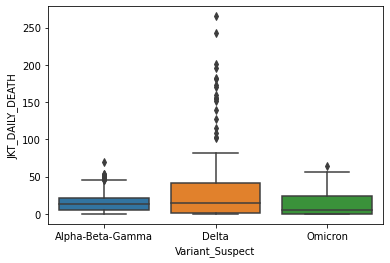

In [3]:
sns.boxplot(x="Variant_Suspect", y="JKT_DAILY_DEATH", data=datacovid)

<AxesSubplot:xlabel='Variant_Suspect', ylabel='count'>

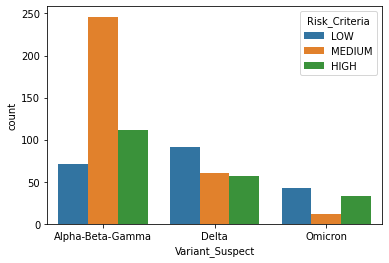

In [7]:
sns.countplot(x="Variant_Suspect", hue="Risk_Criteria", data=datacovid)

In [ ]:
covid_JKT = datacovid.loc[:,['Variant_Suspect','Day','JKT_DAILY_POSITIVE','JKT_DAILY_DEATH','JKT_DAILY_HOSPITALIZED','JKT_DAILY_POSTRATE','JKT_DAILY_TESTED','Risk','Risk_Criteria']]

sns.pairplot(covid_JKT,hue='Variant_Suspect').fig.suptitle("Pair Plot Covid Jakarta", y=1.01)

In [ ]:
covid_ABG = datacovid.loc[datacovid.Variant_Suspect=='Alpha-Beta-Gamma',['Day','JKT_DAILY_POSITIVE','JKT_DAILY_DEATH','JKT_DAILY_HOSPITALIZED','JKT_DAILY_POSTRATE','JKT_DAILY_TESTED','Risk','Risk_Criteria']]
covid_Delta = datacovid.loc[datacovid.Variant_Suspect=='Delta',['Day','JKT_DAILY_POSITIVE','JKT_DAILY_DEATH','JKT_DAILY_HOSPITALIZED','JKT_DAILY_POSTRATE','JKT_DAILY_TESTED','Risk','Risk_Criteria']]
covid_Omicron = datacovid.loc[datacovid.Variant_Suspect=='Omicron',['Day','JKT_DAILY_POSITIVE','JKT_DAILY_DEATH','JKT_DAILY_HOSPITALIZED','JKT_DAILY_POSTRATE','JKT_DAILY_TESTED','Risk','Risk_Criteria']]

In [ ]:
y1 = covid_ABG.JKT_DAILY_POSITIVE
y2 = covid_Delta.JKT_DAILY_POSITIVE
y3 = covid_Omicron.JKT_DAILY_POSITIVE

x1 = covid_ABG.Day
x2 = covid_Delta.Day
x3 = covid_Omicron.Day

plt.rcParams["figure.figsize"] = (15,8)
plt.plot(x1,y1,'--r',label="Daily Alpha-Beta-Gamma")
plt.plot(x2,y2,'-.b',label="Daily Delta")
plt.plot(x3,y3,'g', label="Daily Omicron")
plt.xlabel('Day#')
plt.ylabel('People Positive Covid')
plt.legend()
plt.show()

In [ ]:
sns.pairplot(covid_ABG).fig.suptitle("Pair Plot Covid Variant Alpha - Beta - Gamma", y=1.01)
sns.pairplot(covid_Delta).fig.suptitle("Pair Plot Covid Variant Delta", y=1.01)
sns.pairplot(covid_Omicron).fig.suptitle("Pair Plot Covid Variant Omicron", y=1.01)

In [ ]:
corrdata_ABG = covid_ABG.corr()

corrdata_ABG

In [ ]:
sns.heatmap(corrdata_ABG, annot=True)

In [ ]:
corrdata_Delta = covid_Delta.corr()

corrdata_Delta

In [ ]:
sns.heatmap(corrdata_Delta, annot=True)

In [ ]:
corrdata_Omicron = covid_Omicron.corr()

corrdata_Omicron

In [ ]:
sns.heatmap(corrdata_Delta, annot=True)

In [11]:
datacovid.columns

Index(['Tanggal', 'Variant_Suspect', 'Day', 'ID_CUM_POSITIVE',
       'ID_CUM_HOSPITALIZED', 'ID_CUM_CURED', 'ID_CUM_DEATH',
       'JKT_CUM_POSITIVE', 'JKT_CUM_HOSPITALIZED', 'JKT_CUM_CURED',
       'JKT_CUM_DEATH', 'JKT_CUM_SELFISOLATION', 'JKT_CUM_ACTIVEPOSITIVE',
       'ID_DAILY_POSITIVE', 'ID_DAILY_HOSPITALIZED', 'ID_DAILY_CURED',
       'ID_DAILY_DEATH', 'JKT_DAILY_DEATH', 'JKT_DAILY_CURED',
       'JKT_DAILY_ISOLATION', 'JKT_DAILY_HOSPITALIZED', 'JKT_DAILY_POSITIVE',
       'JKT_DAILY_ACTIVEPOSITIVE', 'JKT_DAILY_TESTED', 'JKT_DAILY_POSTEST',
       'JKT_DAILY_NEGTEST', 'JKT_DAILY_POSTRATE', 'PoF', 'JKT_CONS_VALUE',
       'CoF', 'Risk', 'Risk_Criteria'],
      dtype='object')

In [8]:

fig = px.area(datacovid, x="Day", y="JKT_DAILY_POSITIVE", color="Variant_Suspect")

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.65
))


fig.show()

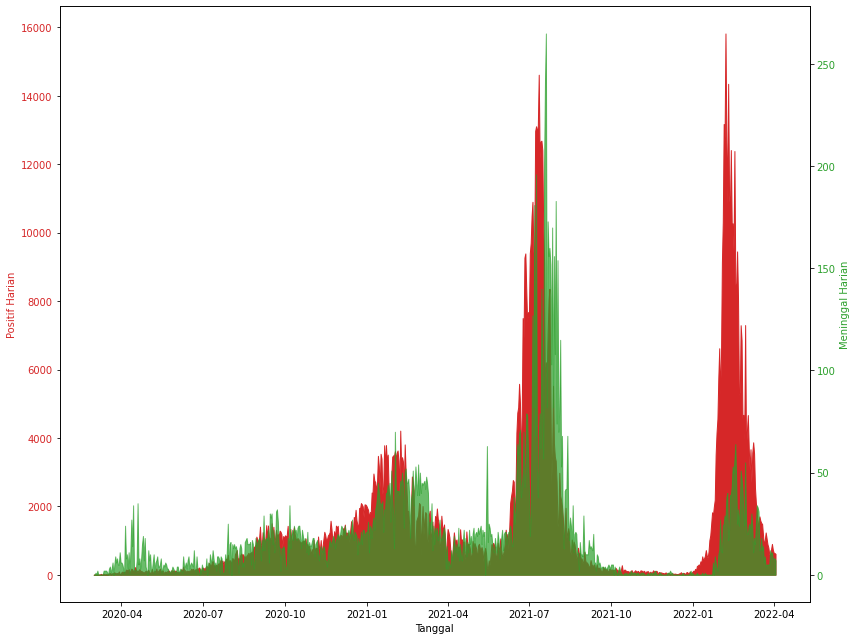

In [17]:
plt.rcParams["figure.figsize"] = (12,9)

fig, ax1 = plt.subplots()

x = datacovid.Tanggal
value1 = datacovid.JKT_DAILY_POSITIVE
value2 = datacovid.JKT_DAILY_DEATH

color = 'tab:red'
ax1.set_xlabel('Tanggal')
ax1.set_ylabel('Positif Harian', color=color)
ax1.fill_between(x, value1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('Meninggal Harian', color=color)  # we already handled the x-label with ax1
ax2.fill_between(x, value2, color=color, alpha=0.7)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

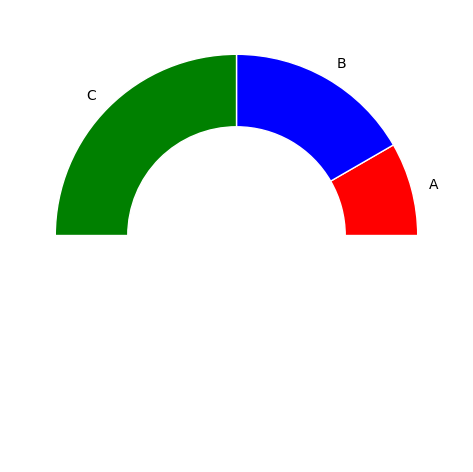

In [3]:
# data
label = ["A", "B", "C"]
val = [1,2,3]

# append data and assign color
label.append("")
val.append(sum(val))  # 50% blank
colors = ['red', 'blue', 'green', 'k']

# plot
plt.figure(figsize=(8,6),dpi=100)

wedges, labels=plt.pie(val, wedgeprops=dict(width=0.4,edgecolor='w'),labels=label, colors=colors)
# I tried this method
wedges[-1].set_visible(False)
plt.show()